In [1]:
import numpy as np

# Section A

Python case sensitivity, implicit casting, complex type, default parameters, and string arithmetic


In [2]:
# Case sensitivity demonstration:

var = 10
Var = 20
print(var)  # 10
print(Var)  # 20
# Different identifiers; Python is case sensitive.


10
20


In [3]:
# Implicit type casting examples:

x = 5        # int
y = 2.0      # float
z = x + y    # 7.0 (int -> float implicitly)

a = True     # bool
b = 3        # int
c = a + b    # 4 (bool -> int implicitly; True == 1)


Complex data type in Python:

Definition: Built-in numeric type to represent complex numbers with real and imaginary parts.

In [4]:
z = 3 + 4j
z.real  # 3.0
z.imag  # 4.0
abs(z)  # 5.0 (magnitude)


5.0

Default parameter in user-defined function:

Definition: A function argument with a preset value used if the caller doesn’t pass that argument.

In [5]:
def greet(name, salutation="Hello"):
    return f"{salutation}, {name}!"

greet("Pat")             # "Hello, Pat!"
greet("Pat", "Namaste")  # "Namaste, Pat!"


'Namaste, Pat!'

Arithmetic operators usable with strings:

Concatenation (+): joins strings.

In [6]:
"Data" + "Science"  # "DataScience"


'DataScience'

Repetition ():* repeats a string n times (where n is an int).

In [7]:
"AI" * 3  # "AIAIAI"


'AIAIAI'

# Section B

List operations

In [8]:
from collections import Counter

list_name = ['Ann', 'Pat', 'David', 'Tisha', 'Sumantha']

# 1. List of lengths
lengths = [len(s) for s in list_name]

# 2. Names with length < 5
short_names = [s for s in list_name if len(s) < 5]

# 3. Dict of {string: length}
len_dict = {s: len(s) for s in list_name}

# 4. Sort by length (descending, largest first); tie-break alphabetically
sorted_by_len = sorted(list_name, key=lambda s: (-len(s), s.lower()))

# 5. Most frequent character across the list (case-insensitive, ignore spaces)
all_chars = "".join(list_name).lower()
freq = Counter(all_chars)
most_common_char, count = freq.most_common(1)[0]

print("Lengths:", lengths)
print("Short names:", short_names)
print("Length dict:", len_dict)
print("Sorted by length:", sorted_by_len)
print("Most frequent char:", most_common_char, "count:", count)


Lengths: [3, 3, 5, 5, 8]
Short names: ['Ann', 'Pat']
Length dict: {'Ann': 3, 'Pat': 3, 'David': 5, 'Tisha': 5, 'Sumantha': 8}
Sorted by length: ['Sumantha', 'David', 'Tisha', 'Ann', 'Pat']
Most frequent char: a count: 6


<img src='1.png' />

Vehicle number plates even/odd

In [9]:
def plate_even_odd(plates):
    result = {}
    for p in plates:
        # Extract last contiguous digit group (the registration number)
        import re
        match = re.findall(r'\d+', p)
        num = int(match[-1]) if match else None
        result[str(num)] = "even" if num % 2 == 0 else "odd"
    return result

number_plates = ['MH 12 XJ - 2234', 'UP 04 LG - 2455', 'GJ 34 RV - 2442', 'KL 07 AP-2433']
print(plate_even_odd(number_plates))
# {'2234': 'even', '2455': 'odd', '2442': 'even', '2433': 'odd'}


{'2234': 'even', '2455': 'odd', '2442': 'even', '2433': 'odd'}


# Section C

Dataset tasks with pandas

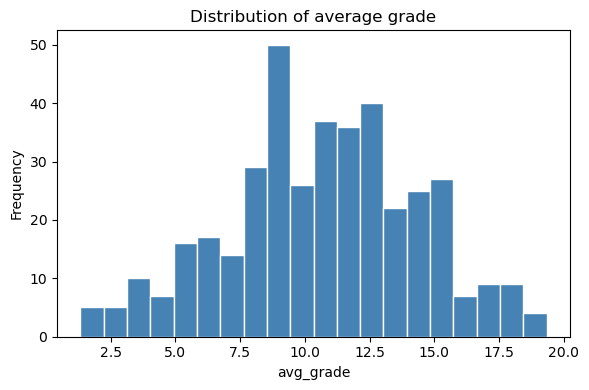

% stressed: 22.53%
Average age (female): 16.73
Correlation (studytime vs avg_grade): 0.135


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("teenage_stress-1.csv")

# 1. % of stressed students
pct_stressed = 100 * df['stress'].mean()

# 2. Average age of female students
avg_age_female = df.loc[df['sex'] == 'F', 'age'].mean()

# 3. Add avg_grade = mean of G1, G2, G3
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# 4. Correlation between studytime and avg_grade
corr_studytime_avg = df['studytime'].corr(df['avg_grade'])

# 5. Distribution of average grade (histogram)
plt.figure(figsize=(6,4))
plt.hist(df['avg_grade'], bins=20, color='steelblue', edgecolor='white')
plt.title("Distribution of average grade")
plt.xlabel("avg_grade")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print(f"% stressed: {pct_stressed:.2f}%")
print(f"Average age (female): {avg_age_female:.2f}")
print(f"Correlation (studytime vs avg_grade): {corr_studytime_avg:.3f}")


Notes:

- pct_stressed uses 0/1 values; mean × 100.

- avg_grade column persists for later questions.

Family role and stress: crosstab, pivot, min/max, free time, working mother

stress    0   1
famrel         
1         6   2
2        13   5
3        53  15
4       150  45
5        84  22
famsup   no  yes
famsize         
GT3      18   44
LE3      12   15
Min avg_grade (parent higher ed): 2.00
Max avg_grade (parent higher ed): 19.33
Average freetime (GT3): 3.22
Stressed with freetime < average (GT3): 38
stress            0   1
working_mother         
no               44  15
yes             262  74


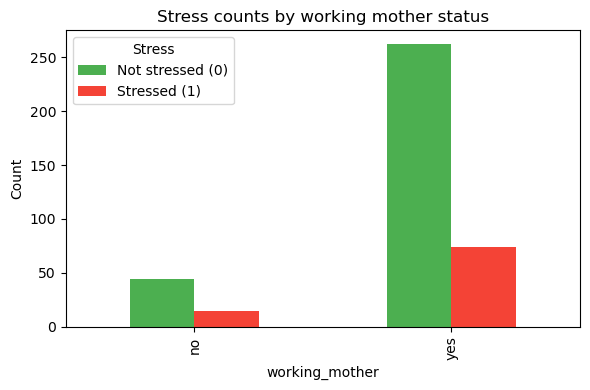

In [145]:
# 1. Crosstab: family relationship quality vs stress
ct_famrel_stress = pd.crosstab(df['famrel'], df['stress'])
print(ct_famrel_stress)

# 2. Pivot: stressed count by famsize and famsup
pivot_stressed = pd.pivot_table(
    df, index='famsize', columns='famsup',
    values='stress', aggfunc='sum', fill_value=0
)
print(pivot_stressed)

# 3. Min & max avg_grade for students whose parents have higher education
# Interpret "higher education" as Medu == 4 or Fedu == 4 (either parent)
higher_ed = df[(df['Medu'] == 4) | (df['Fedu'] == 4)]
min_avg = higher_ed['avg_grade'].min()
max_avg = higher_ed['avg_grade'].max()
print(f"Min avg_grade (parent higher ed): {min_avg:.2f}")
print(f"Max avg_grade (parent higher ed): {max_avg:.2f}")

# If you want both parents higher ed simultaneously, use:
# both_higher_ed = df[(df['Medu'] == 4) & (df['Fedu'] == 4)]

# 4. Average free time in families with >3 members (GT3), and stressed count below that average
gt3 = df[df['famsize'] == 'GT3']
avg_freetime_gt3 = gt3['freetime'].mean()
stressed_below_avg = gt3[(gt3['freetime'] < avg_freetime_gt3) & (gt3['stress'] == 1)].shape[0]
print(f"Average freetime (GT3): {avg_freetime_gt3:.2f}")
print(f"Stressed with freetime < average (GT3): {stressed_below_avg}")

# 5. Working mother status and impact on stress counts
# Define working_mother: Mjob != 'at_home' -> yes; 'at_home' -> no
df['working_mother'] = np.where(df['Mjob'].str.lower() == 'at_home', 'no', 'yes')

# Plot stress counts by working_mother
stress_counts = df.groupby(['working_mother', 'stress']).size().unstack(fill_value=0)
print(stress_counts)

stress_counts.plot(kind='bar', stacked=False, figsize=(6,4), color=['#4caf50','#f44336'])
plt.title("Stress counts by working mother status")
plt.xlabel("working_mother")
plt.ylabel("Count")
plt.legend(['Not stressed (0)', 'Stressed (1)'], title='Stress')
plt.tight_layout()
plt.show()


In [146]:
stress_counts = df.groupby(['working_mother', 'stress']).size().unstack(fill_value=0)
print(stress_counts)

stress            0   1
working_mother         
no               44  15
yes             262  74


<Axes: xlabel='working_mother'>

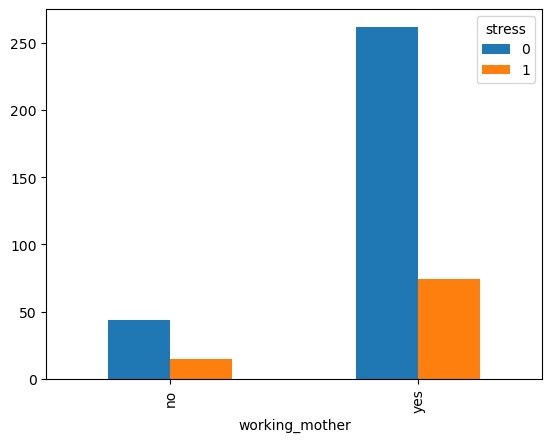

In [155]:
dd = pd.crosstab(df['working_mother'], df['stress'])
dd.plot(kind='bar')

<Axes: xlabel='working_mother'>

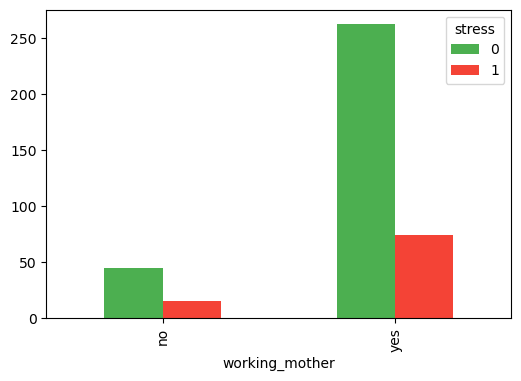

In [153]:
dd.plot(kind='bar', stacked=False, figsize=(6,4), color=['#4caf50','#f44336'])

**Notes:**

- I used “either parent has higher education” for a broader interpretation. If your rubric expects both parents, switch to the commented filter.

- Bar chart shows how stress counts vary with working mother status.

Plots and progression performance

<Figure size 600x400 with 0 Axes>

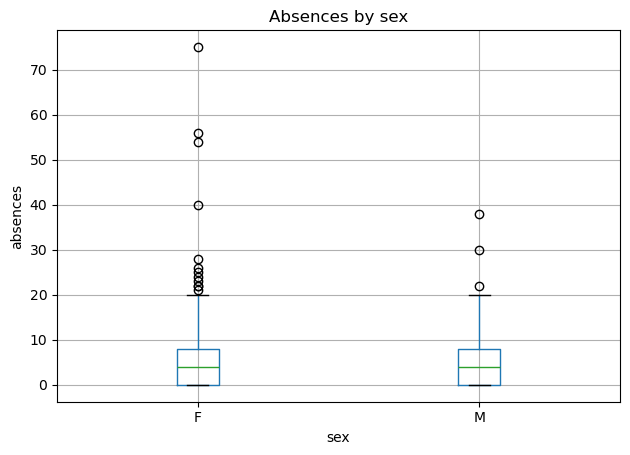

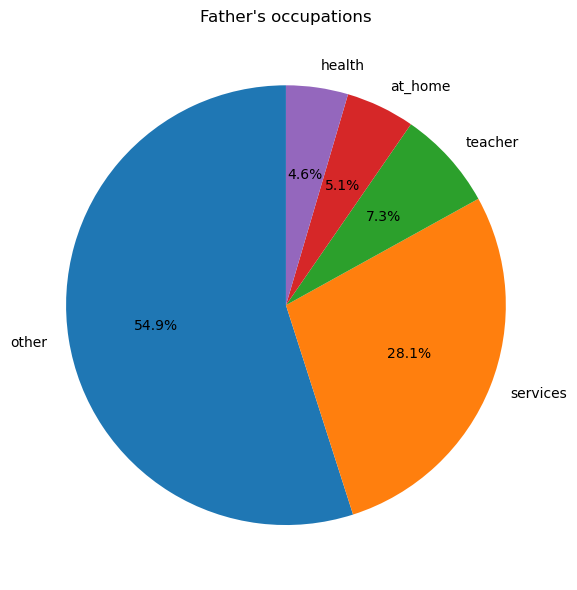

Progressively improving students: 33
Progressive & romantic – gender distribution:
sex
F    7
M    2
Name: count, dtype: int64


In [12]:
# 1. Boxplot of absences by gender
plt.figure(figsize=(6,4))
df.boxplot(column='absences', by='sex')
plt.title("Absences by sex")
plt.suptitle("")  # Remove default suptitle
plt.xlabel("sex")
plt.ylabel("absences")
plt.tight_layout()
plt.show()

# 2. Pie chart for father's occupation distribution
fjob_counts = df['Fjob'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fjob_counts, labels=fjob_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Father's occupations")
plt.tight_layout()
plt.show()

# 3. Students who perform progressively (G1 < G2 < G3)
progressive_mask = (df['G1'] < df['G2']) & (df['G2'] < df['G3'])
progressive_count = progressive_mask.sum()
print(f"Progressively improving students: {progressive_count}")

# 4. Progressive among those in romantic relationships; gender-wise distribution
romantic_progressive = df[progressive_mask & (df['romantic'] == 'yes')]
gender_dist = romantic_progressive['sex'].value_counts()
print("Progressive & romantic – gender distribution:")
print(gender_dist)


**Definitions:**

- “Progressively” means strictly increasing grades: G1 < G2 < G3.

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('teenage_stress-1.csv')
df.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,...,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,stress
0,F,18,GT3,A,4,4,at_home,teacher,mother,2,...,no,4,3,4,3,6,5,6,6,0
1,F,17,GT3,T,1,1,at_home,other,father,2,...,no,5,3,3,3,4,5,5,6,0
2,F,15,LE3,T,1,1,at_home,other,mother,2,...,no,4,3,2,3,10,7,8,10,0
3,F,15,GT3,T,4,2,health,services,mother,3,...,yes,3,2,2,5,2,15,14,15,0
4,F,16,GT3,T,3,3,other,other,father,2,...,no,4,3,2,5,4,6,10,10,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   Medu        395 non-null    int64 
 5   Fedu        395 non-null    int64 
 6   Mjob        395 non-null    object
 7   Fjob        395 non-null    object
 8   guardian    395 non-null    object
 9   studytime   395 non-null    int64 
 10  schoolsup   395 non-null    object
 11  famsup      395 non-null    object
 12  paid        395 non-null    object
 13  activities  395 non-null    object
 14  internet    395 non-null    object
 15  romantic    395 non-null    object
 16  famrel      395 non-null    int64 
 17  freetime    395 non-null    int64 
 18  goout       395 non-null    int64 
 19  health      395 non-null    int64 
 20  absences  

In [16]:
(len(df[df['stress'] == 1]) / df.shape[0]) * 100

22.531645569620252

In [17]:
len(df)

395

In [18]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [19]:
df[df['sex'] == 'F']['age'].mean()

np.float64(16.73076923076923)

In [20]:
(df['G1'] + df['G2'] + df['G3']) / 3

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64

In [21]:
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [22]:
df['avg_grade']

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: avg_grade, Length: 395, dtype: float64

In [23]:
df[['G1', 'G2', 'G3']].mean(axis=1)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64

In [24]:
df['studytime'].corr(df['avg_grade'])

np.float64(0.13456471886640672)

In [25]:
df['avg_grade'].corr(df['studytime'])

np.float64(0.13456471886640672)

In [26]:
import seaborn as sns

<Axes: >

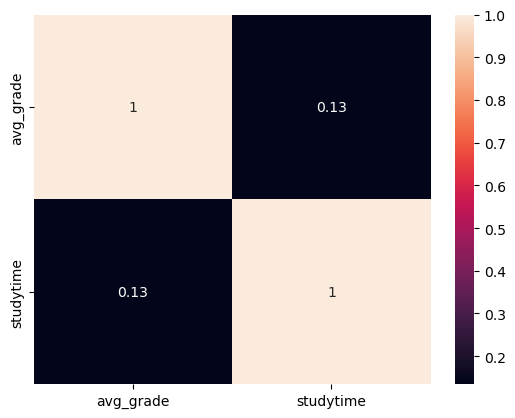

In [27]:
from statistics import kde


sns.heatmap(df[['avg_grade', 'studytime']].corr(), annot=True)

<Axes: ylabel='Frequency'>

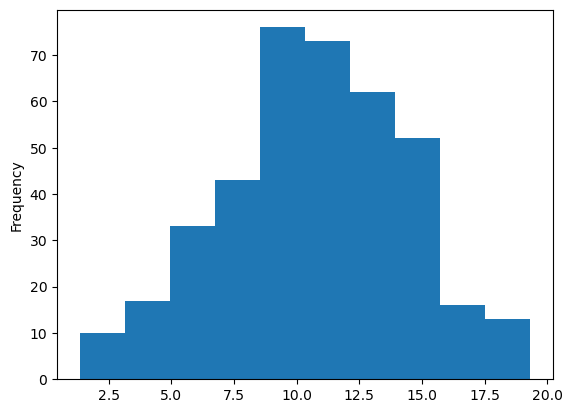

In [28]:
df['avg_grade'].plot(kind='hist')

<Axes: xlabel='avg_grade', ylabel='Count'>

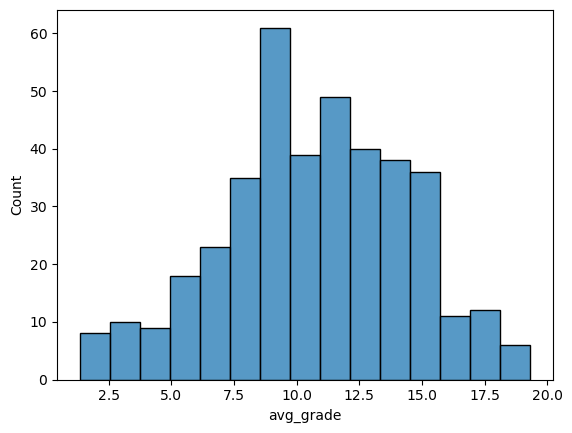

In [29]:
sns.histplot(df['avg_grade'], bins=15)

In [30]:
# Create a cross table with values of family relation quality against stress status.(2
# Mark)

pd.crosstab(df['famrel'], df['stress'])

stress,0,1
famrel,,
1,6,2
2,13,5
3,53,15
4,150,45
5,84,22


In [31]:
pivot_stressed = pd.pivot_table(
    df, index='famsize', columns='famsup',
    values='stress', aggfunc='sum', fill_value=0
)
print(pivot_stressed)

famsup   no  yes
famsize         
GT3      18   44
LE3      12   15


In [32]:
df['famsup'].value_counts()

famsup
yes    242
no     153
Name: count, dtype: int64

In [33]:
df['famsize'].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

In [34]:
pd.pivot_table(df, index=df['famsize'], columns=df['famsup'], values='stress', aggfunc='sum')

famsup,no,yes
famsize,,
GT3,18,44
LE3,12,15


In [36]:
df[(df['Medu'] == 4) & (df['Fedu'] == 4)]['avg_grade'].min(), df[(df['Medu'] == 4) & (df['Fedu'] == 4)]['avg_grade'].max()

(3.6666666666666665, 18.666666666666668)

In [49]:
# 4. How much average free time does a student living in a family with greater than
# 3 members. How many students with free time less than average free time in such
# families are stressed

from cProfile import label


dd = df[df['famsize'] == 'GT3']
free_time = dd['freetime'].mean()
print(free_time)

dd[(dd['freetime'] < free_time) & dd['stress']].shape[0]

3.224199288256228


38

In [50]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [81]:
df['MOcc'] = np.where(df['Mjob'] == 'at_home','no', 'yes')
df['MOcc'].value_counts()

MOcc
yes    336
no      59
Name: count, dtype: int64

In [83]:
df['MOcc'] = df['Mjob'].apply(lambda x: 'yes' if x == 'at_home' else 'no')
df['MOcc'].value_counts()

MOcc
no     336
yes     59
Name: count, dtype: int64

In [79]:
df[df['Mjob'] == 'at_home'].shape[0]

59

In [82]:
336 + 59

395

In [77]:
len(df['Mjob'])

395

In [72]:
dd['Mjob'].head()

0    at_home
1    at_home
3     health
4      other
7      other
Name: Mjob, dtype: object

In [73]:
dd['Mjob'].value_counts()

Mjob
other       106
services     70
at_home      44
teacher      37
health       24
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='absences'>

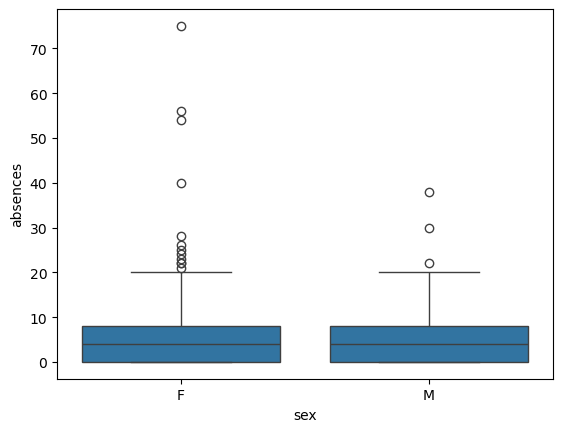

In [89]:
# Plot the boxplot of absences against the gender of students
sns.boxplot(data=df, y='absences', x = 'sex')
# df['absences'], df['sex']

In [96]:
df['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

<Axes: ylabel='count'>

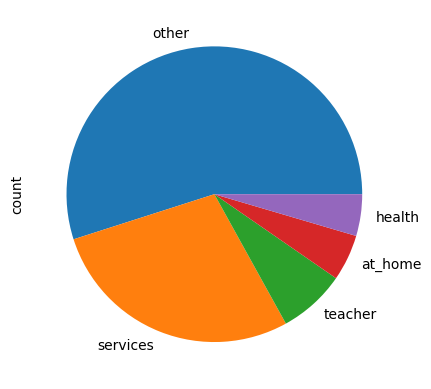

In [104]:
((df['Fjob'].value_counts() / df.shape[0]) * 100).plot(kind='pie', labels=fjob_counts.index)

In [101]:
df['Fjob'].value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

In [105]:
ss = df['Fjob'].value_counts()
ss

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1764a1bd0>,
 [Text(-1.0867971625028703, -0.16991741398605986, 'other'),
  Text(1.0224317471833715, -0.40575032021128316, 'services'),
  Text(0.8155051475342011, 0.7382082052816948, 'teacher'),
  Text(0.4738912131558779, 0.9926868177293635, 'at_home'),
  Text(0.15693968899538582, 1.0887469559167693, 'health')],
 [Text(-0.5927984522742927, -0.0926822258105781, '54.9%'),
  Text(0.5576900439182025, -0.2213183564788817, '28.1%'),
  Text(0.4448209895641097, 0.4026590210627426, '7.3%'),
  Text(0.2584861162668425, 0.5414655369432891, '5.1%'),
  Text(0.0856034667247559, 0.5938619759546014, '4.6%')])

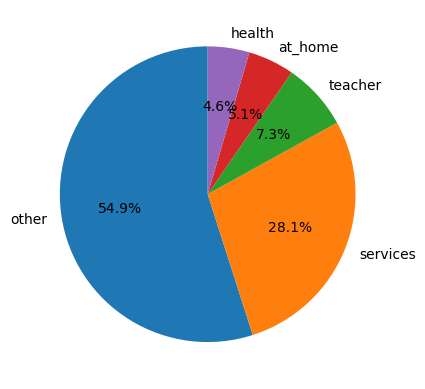

In [116]:
plt.pie(ss, labels=ss.index, autopct='%1.1f%%', startangle=90)

Text(0.5, 1.0, 'Some title')

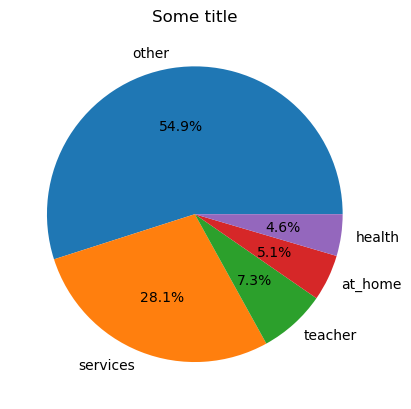

In [120]:
plt.pie(ss, labels=ss.index, autopct='%1.1f%%')
plt.title('Some title')

In [122]:
# ??plt.pie

In [125]:
df[(df['G1'] < df['G2']) & (df['G2']< df['G3'])].shape[0]

33

In [126]:
progressive_mask = (df['G1'] < df['G2']) & (df['G2'] < df['G3'])
progressive_count = progressive_mask.sum()
print(f"Progressively improving students: {progressive_count}")

Progressively improving students: 33


In [130]:
ss = df[progressive_mask][df['romantic'] == 'yes']
ss.shape[0]

/var/folders/6r/86jpjbx9667_wsdjbp1ln2rc0000gn/T/ipykernel_2992/2965321764.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ss = df[progressive_mask][df['romantic'] == 'yes']


9

In [133]:
dd = ss['sex'].value_counts()

([<matplotlib.patches.Wedge at 0x17b0fca50>,
 [Text(-0.8426490478933555, 0.7070661794234129, 'F'),
  Text(0.8426491097070433, -0.7070661057566878, 'M')],
 [Text(-0.45962675339637565, 0.3856724615036797, '77.8%'),
  Text(0.45962678711293264, -0.38567242132182966, '22.2%')])

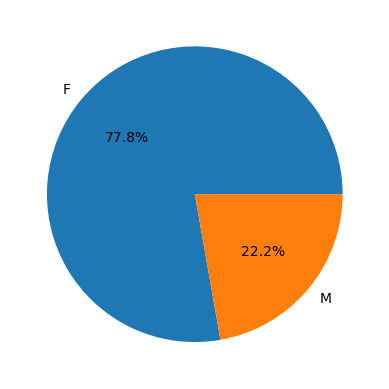

In [143]:
plt.pie(dd, labels=dd.index, autopct='%1.1f%%')